In [0]:
# competition

# https://www.kaggle.com/c/digit-recognizer/data?select=test.csv

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def KNN(X, y, testing_point, k = 7):
    
    # Step 1
    Val = []
    for i in range(X.shape[0]) :
        dis = np.sqrt(sum((X[i]-testing_point)**2))
        Val.append([dis, y[i]])

    # Step 2
    Val = sorted(Val)

    # Step 3
    Vals = Val[:k]
    Vals = np.array(Vals)

    # Step 4
    new_vals = np.unique(Vals[:, 1], return_counts= True)
    index = np.argmax(new_vals[1])

    # Step 5
    prediction = new_vals[0][index]

    return prediction

In [4]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smagni","key":"0ea22017b6052eb6b8adc0ef5988d4dc"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d oddrationale/mnist-in-csv

 59% 9.00M/15.2M [00:00<00:00, 13.5MB/s]
100% 15.2M/15.2M [00:00<00:00, 23.7MB/s]


In [7]:
!unzip '/content/mnist-in-csv.zip'

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [18]:
# !unrar x '/content/test.csv.zip'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

/content/test.csv.zip is not RAR archive
No files to extract


# Start

In [0]:
df = pd.read_csv('/content/mnist_train.csv')

In [9]:
df.shape

(60000, 785)

In [10]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [0]:
def plot_img(x):
    x = x.reshape((28,28))
    plt.imshow(x, cmap= "gray")
    plt.axis("off")
    plt.show()

In [12]:
y = df.iloc[:, 0].values
X = df.iloc[:, 1: ].values
X.shape, y.shape

((60000, 784), (60000,))

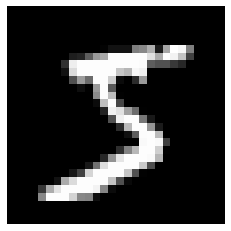

5


In [13]:
plot_img(X[0])
print(y[0])

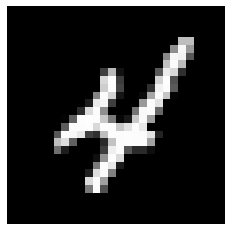

4


In [14]:
plot_img(X[9])
print(y[9])

## KNN Scratch

In [0]:
test = pd.read_csv("/content/test.csv")

In [33]:
test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [0]:
test = test.values

In [0]:
from tqdm import tqdm

In [26]:
pred = []

for i in tqdm(range(0, 25)):
    pred.append(KNN(X, y, test[i], k = 7))


100%|██████████| 25/25 [04:02<00:00,  9.69s/it]


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
clf = KNeighborsClassifier(n_neighbors= 7, n_jobs= -1)
clf.fit(X, y)
pred1 = clf.predict(test)

KeyboardInterrupt: ignored

In [29]:
pred == pred1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [0]:
pd.DataFrame(pred1).to_csv("pred1.csv")

2.0


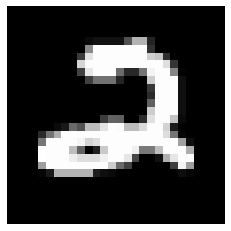

0.0


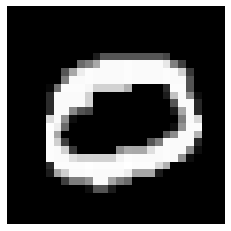

9.0


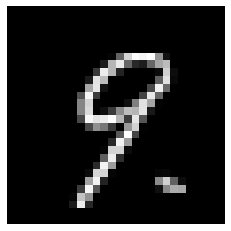

9.0


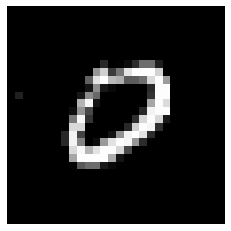

3.0


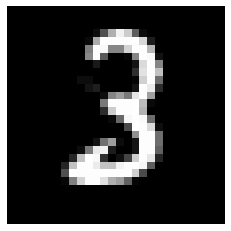

7.0


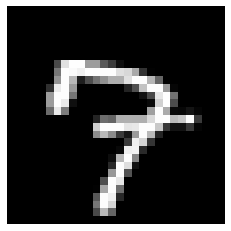

0.0


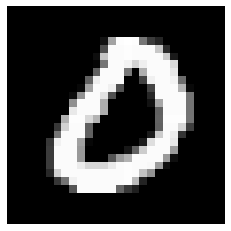

3.0


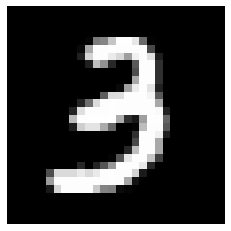

0.0


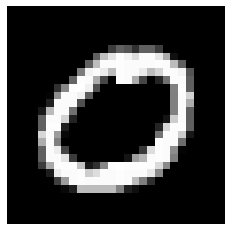

3.0


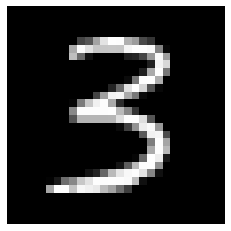

5.0


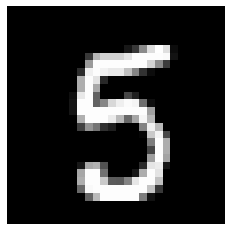

7.0


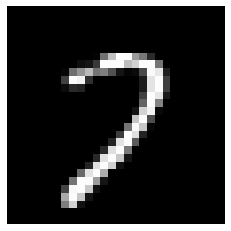

4.0


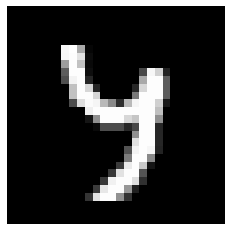

0.0


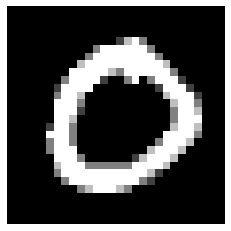

4.0


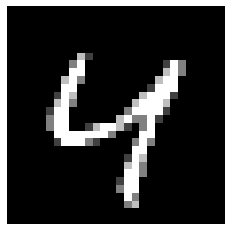

3.0


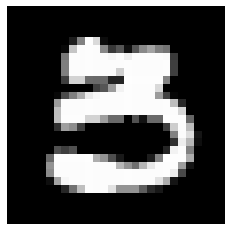

3.0


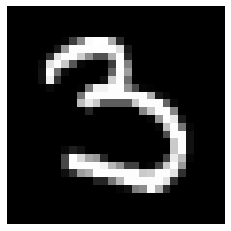

1.0


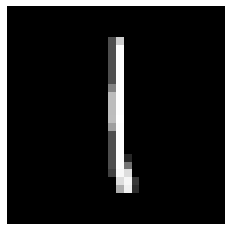

9.0


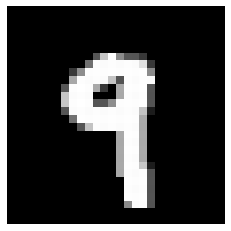

0.0


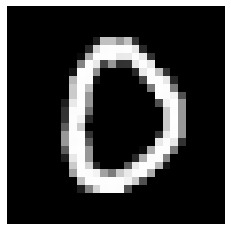

9.0


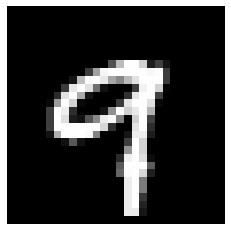

1.0


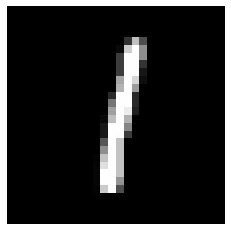

1.0


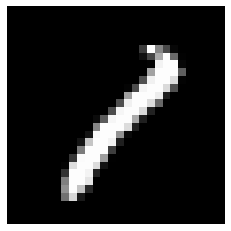

5.0


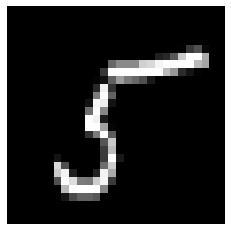

7.0


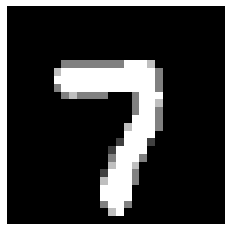

In [39]:
for i in range(len(pred)):
    print(pred[i])
    plot_img(test[i])

In [40]:
24/25

0.96